In [65]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

import os

In [66]:
test_file = glob("./test_results/*")
test_file[0]

'./test_results/log_sim_ppo_norway_tram_24'

In [67]:
file_schema = test_file[0]

In [86]:
def read_test_file(_file_name):
    with open(_file_name, "r") as f:
        time_stamp, action, buffer_size, rebuf, chunk_size_1, chunk_size_2, delay, entropy, reward = [], [], [], [], [], [], [], [], []
        for line in f:            
            try:
                sp = line.split()
                if len(sp) > 1:
                        time_stamp.append(float(sp[0]))
                        action.append(int(sp[1]))
                        buffer_size.append(float(sp[2]))
                        rebuf.append(float(sp[3]))

                        # Process chunk_size with two components
                        chunk_size_str = sp[4].strip('()')
                        chunk_size_parts = [x for x in chunk_size_str.split(',') if x]  # Filter out empty strings
                        chunk_size_1.append(float(chunk_size_parts[0]) if chunk_size_parts else 0.0)
                        chunk_size_2.append(float(chunk_size_parts[1]) if len(chunk_size_parts) > 1 else 0.0)

                        delay.append(float(sp[6]))
                        entropy.append(float(sp[7]))
                        reward.append(float(sp[8]))
            except:
                pass
        # Creating a DataFrame
        data = {
            'Time Stamp': time_stamp,
            'Action': action,
            'Buffer Size': buffer_size,
            'Rebuffering': rebuf,
            'Chunk Size 1': chunk_size_1,
            'Chunk Size 2': chunk_size_2,
            'Delay': delay,
            'Entropy': entropy,
            'Reward': reward
        }
    return pd.DataFrame(data)

In [87]:
df = [read_test_file(_i) for _i in test_file]
df_big = pd.concat(df, ignore_index=True).reset_index(drop=True)

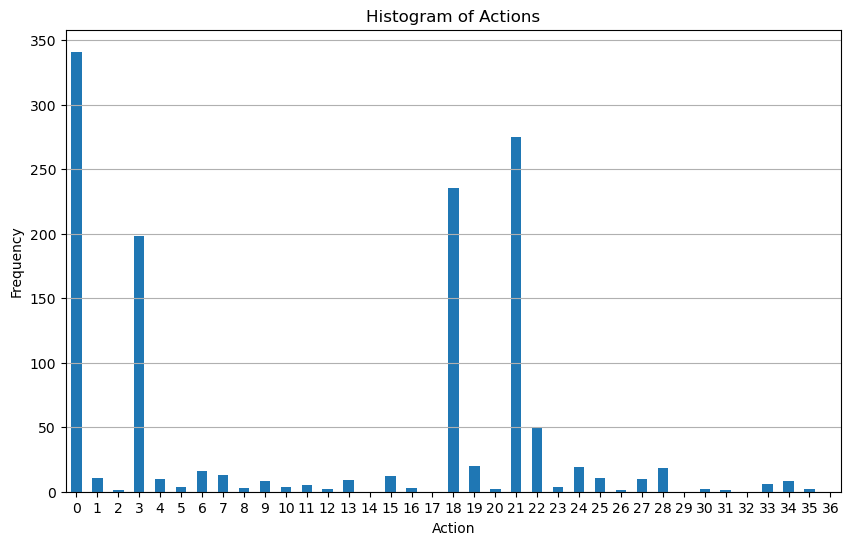

In [88]:
# Count occurrences of each action
action_counts = df_big['Action'].value_counts().reindex(range(37), fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
action_counts.plot(kind='bar')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Histogram of Actions')
plt.xticks(range(37), rotation=0)  # Ensure all action numbers are shown
plt.grid(axis='y')
plt.show()


In [57]:
sorted_action_counts = action_counts.sort_values(ascending=False)
sorted_action_counts


33    1000
3       86
1       28
4        1
2        1
16       1
19       1
0        0
5        0
9        0
10       0
7        0
6        0
12       0
11       0
14       0
13       0
15       0
17       0
18       0
8        0
20       0
21       0
23       0
22       0
25       0
26       0
27       0
24       0
28       0
29       0
31       0
30       0
32       0
34       0
35       0
36       0
Name: Action, dtype: int64